In [6]:

#1.a.Use the use case in the class Add more Dense layers to the existing code and check how the accuracy changes.
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split

# Load dataset [cite: 7]
# Ensure diabetes.csv is in the same directory
dataset = pd.read_csv("diabetes.csv", header=None).values

# Split data into training and testing (25% test size) [cite: 7]
X_train, X_test, Y_train, Y_test = train_test_split(dataset[:,0:8], dataset[:,8],
test_size=0.25, random_state=87)
np.random.seed(155)

# Create model [cite: 1]
my_first_nn = Sequential()

# 1. Initial Hidden Layer [cite: 1]
my_first_nn.add(Dense(20, input_dim=8, activation='relu'))

# 2. ADDITIONAL Dense Layer 1
my_first_nn.add(Dense(16, activation='relu'))

# 3. ADDITIONAL Dense Layer 2
my_first_nn.add(Dense(8, activation='relu'))

# Output layer (Sigmoid is used for binary classification) [cite: 1]
my_first_nn.add(Dense(1, activation='sigmoid'))

# Compile and Fit [cite: 1]
my_first_nn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])
my_first_nn.fit(X_train, Y_train, epochs=100, verbose=0)

# Evaluate the changes
print("--- Model Summary with Added Layers ---")
print(my_first_nn.summary())
print("\nEvaluation (Loss, Accuracy):")
print(my_first_nn.evaluate(X_test, Y_test))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


--- Model Summary with Added Layers ---


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_13 (Dense)                │ (None, 20)             │           180 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 16)             │           336 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,985 (7.76 KB)

 Trainable params: 661 (2.58 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,324 (5.18 KB)

None

Evaluation (Loss, Accuracy):
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - acc: 0.7391 - loss: 0.5622  
[0.6026811003684998, 0.71875]


In [13]:
#1.b.change the data source to Breast Cancer Dataset*Available in the cource code fold changes.Report accuracy
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

# -------- Load Breast Cancer dataset --------
# If your file is named "Breas Cancer.csv", change the filename below.
df = pd.read_csv("breastcancer.csv")

# Drop the extra empty column if it exists (common in this dataset)
if "Unnamed: 32" in df.columns:
    df = df.drop(columns=["Unnamed: 32"])

# Convert labels: Malignant(M)=1, Benign(B)=0
Y = df["diagnosis"].map({"M": 1, "B": 0}).astype("float32").values

# Features: drop ID and label column
X = df.drop(columns=["id", "diagnosis"]).astype("float32").values

# -------- Train/Test split (same style as class code) --------
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.25, random_state=87, stratify=Y
)

# Reproducibility
np.random.seed(155)
keras.utils.set_random_seed(155)

# -------- Build model (same architecture as class baseline) --------
model = Sequential()
model.add(Dense(20, input_dim=X.shape[1], activation="relu"))  # hidden layer
model.add(Dense(1, activation="sigmoid"))                     # output layer

model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
model.fit(X_train, Y_train, epochs=100, verbose=0)

print(model.summary())

# -------- Report accuracy --------
loss, acc = model.evaluate(X_test, Y_test, verbose=0)
print("\nBreast Cancer Test Accuracy:", acc)
print("Breast Cancer Test Loss:", loss)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_31 (Dense)                │ (None, 20)             │           620 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_32 (Dense)                │ (None, 1)              │            21 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,925 (7.52 KB)

 Trainable params: 641 (2.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,284 (5.02 KB)

None

Breast Cancer Test Accuracy: 0.8181818127632141
Breast Cancer Test Loss: 0.7136974930763245


In [8]:
#1.c.Normalize the data before feeding the data to the model and check how the normalization change your accuracy
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

# -------- Load dataset --------
df = pd.read_csv("breastcancer.csv")

# Drop extra column if present
if "Unnamed: 32" in df.columns:
    df = df.drop(columns=["Unnamed: 32"])

# Labels: M -> 1, B -> 0
Y = df["diagnosis"].map({"M": 1, "B": 0}).astype("float32").values

# Features
X = df.drop(columns=["id", "diagnosis"]).astype("float32").values

# -------- Train/Test split --------
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.25, random_state=87, stratify=Y
)

# -------- NORMALIZATION (Task 3 requirement) --------
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Reproducibility
np.random.seed(155)
keras.utils.set_random_seed(155)

# -------- Build same model as before --------
model = Sequential()
model.add(Dense(20, input_dim=X.shape[1], activation="relu"))
model.add(Dense(1, activation="sigmoid"))

model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
model.fit(X_train, Y_train, epochs=100, verbose=0)

# -------- Evaluate --------
loss, acc = model.evaluate(X_test, Y_test, verbose=0)

print("Breast Cancer Accuracy WITH normalization:", acc)
print("Breast Cancer Loss WITH normalization:", loss)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Breast Cancer Accuracy WITH normalization: 0.9930070042610168
Breast Cancer Loss WITH normalization: 0.024917688220739365


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Epoch 1/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 7s 25ms/step - accuracy: 0.8331 - loss: 0.5282 - val_accuracy: 0.9561 - val_loss: 0.1381
Epoch 2/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - accuracy: 0.9667 - loss: 0.1136 - val_accuracy: 0.9672 - val_loss: 0.1039
Epoch 3/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 24ms/step - accuracy: 0.9798 - loss: 0.0681 - val_accuracy: 0.9691 - val_loss: 0.0969
Epoch 4/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - accuracy: 0.9870 - loss: 0.0447 - val_accuracy: 0.9661 - val_loss: 0.1070
Epoch 5/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step - accuracy: 0.9912 - loss: 0.0311 - val_accuracy: 0.9674 - val_loss: 0.1151
Epoch 6/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 10s 25ms/step - accuracy: 0.9942 - loss: 0.0197 - val_accuracy: 0.9725 - val_loss: 0.0943
Epoch 7/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - accuracy: 0.9951 - loss: 0.0158 - val_accuracy: 0.9804 - val_loss: 0.0784
Epoch 8/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 24

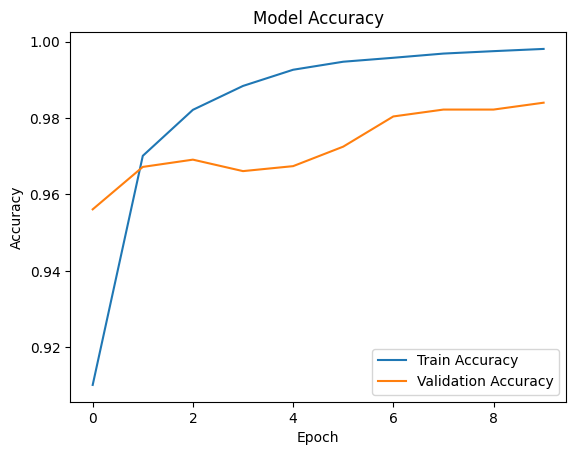

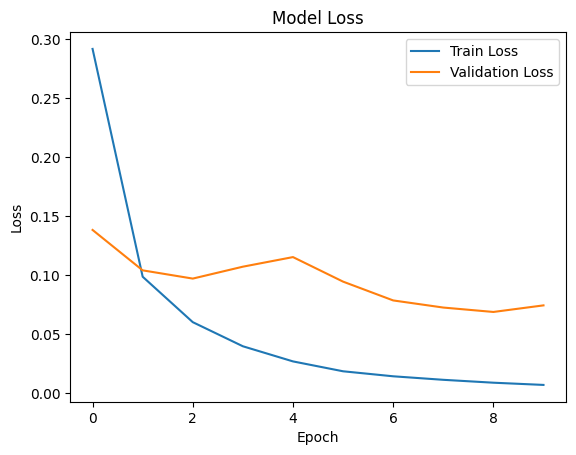

In [9]:
#2.1.Plot the loss and accuracy for both training data and validation data using th historic object in the source code
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
import numpy as np

# Load and preprocess
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
dimData = np.prod(train_images.shape[1:])
train_data = train_images.reshape(train_images.shape[0], dimData).astype('float32') / 255
test_data = test_images.reshape(test_images.shape[0], dimData).astype('float32') / 255

train_labels_one_hot = to_categorical(train_labels)
test_labels_one_hot = to_categorical(test_labels)

# Build Model
model = Sequential([
    Dense(512, activation='relu', input_shape=(784,)),
    Dense(512, activation='relu'),
    Dense(10, activation='softmax')
])
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

# Capture history
history = model.fit(train_data, train_labels_one_hot, batch_size=256, epochs=10,
                    verbose=1, validation_data=(test_data, test_labels_one_hot))

# Plot Accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

# Plot Loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

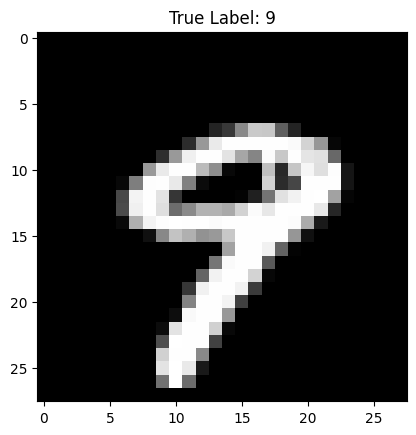

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step
The model predicts this image is a: 9


In [10]:
#2.2.Plot one of the images in the test data, and then do inferencing to check what is the prediction of the model on the single image
# Select the 10th image from the test set
sample_image = test_images[9]
plt.imshow(sample_image, cmap='gray')
plt.title(f"True Label: {test_labels[9]}")
plt.show()

# Reshape and Predict
sample_data = sample_image.reshape(1, 784).astype('float32') / 255
prediction = model.predict(sample_data)
predicted_class = np.argmax(prediction)

print(f"The model predicts this image is a: {predicted_class}")

In [11]:
#2.3.We had used 2 hidden layers and Relu Activation. Try to change the number of hidden layer and theActivation to tanh or sigmoid and see what happens
from keras import Sequential
from keras.datasets import mnist
from keras.layers import Dense
from keras.utils import to_categorical
import numpy as np

# 1. Load and Preprocess Data
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
dimData = np.prod(train_images.shape[1:])
train_data = train_images.reshape(train_images.shape[0], dimData).astype('float32') / 255
test_data = test_images.reshape(test_images.shape[0], dimData).astype('float32') / 255

train_labels_one_hot = to_categorical(train_labels)
test_labels_one_hot = to_categorical(test_labels)

# 2. Creating the Modified Network
model = Sequential()

# We use 3 hidden layers now and change activation to 'tanh'
model.add(Dense(512, activation='tanh', input_shape=(dimData,))) # Hidden Layer 1
model.add(Dense(256, activation='tanh'))                        # Hidden Layer 2
model.add(Dense(128, activation='tanh'))                        # Hidden Layer 3 (Added)

# Output layer remains Softmax for multi-class classification
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

# 3. Training
history = model.fit(train_data, train_labels_one_hot, batch_size=256, epochs=10,
                    verbose=1, validation_data=(test_data, test_labels_one_hot))

# 4. Evaluation

loss, accuracy = model.evaluate(test_data, test_labels_one_hot, verbose=0)
print(f"Test Accuracy with Tanh and 3 Hidden Layers: {accuracy*100:.2f}%")

Epoch 1/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 15s 56ms/step - accuracy: 0.8321 - loss: 0.5255 - val_accuracy: 0.9471 - val_loss: 0.1887
Epoch 2/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - accuracy: 0.9523 - loss: 0.1619 - val_accuracy: 0.9558 - val_loss: 0.1445
Epoch 3/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - accuracy: 0.9690 - loss: 0.1035 - val_accuracy: 0.9584 - val_loss: 0.1272
Epoch 4/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 10s 27ms/step - accuracy: 0.9785 - loss: 0.0722 - val_accuracy: 0.9634 - val_loss: 0.1112
Epoch 5/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - accuracy: 0.9847 - loss: 0.0513 - val_accuracy: 0.9723 - val_loss: 0.0865
Epoch 6/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - accuracy: 0.9900 - loss: 0.0363 - val_accuracy: 0.9760 - val_loss: 0.0789
Epoch 7/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step - accuracy: 0.9937 - loss: 0.0255 - val_accuracy: 0.9744 - val_loss: 0.0829
Epoch 8/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - accuracy: 0.9959 - loss: 0.0178 - val_ac

In [12]:
#2.4.Run the same code without scaling the images and check the performance
import numpy as np
from keras import Sequential
from keras.datasets import mnist
from keras.layers import Dense
from keras.utils import to_categorical

# 1. Load data
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
dimData = np.prod(train_images.shape[1:])

# 2. Reshape to 784 dimensions but KEEPING the range [0, 255]
# Note: We comment out the division by 255.0
train_data = train_images.reshape(train_images.shape[0], dimData).astype('float32')
test_data = test_images.reshape(test_images.shape[0], dimData).astype('float32')

# 3. Process labels
train_labels_one_hot = to_categorical(train_labels)
test_labels_one_hot = to_categorical(test_labels)

# 4. Create and compile network
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(dimData,)))
model.add(Dense(512, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

# 5. Training
history = model.fit(train_data, train_labels_one_hot, batch_size=256, epochs=10,
                    verbose=1, validation_data=(test_data, test_labels_one_hot))

Epoch 1/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 8s 30ms/step - accuracy: 0.7933 - loss: 21.1693 - val_accuracy: 0.9347 - val_loss: 0.5963
Epoch 2/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 8s 33ms/step - accuracy: 0.9408 - loss: 0.5154 - val_accuracy: 0.9164 - val_loss: 0.5903
Epoch 3/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - accuracy: 0.9558 - loss: 0.2678 - val_accuracy: 0.9323 - val_loss: 0.4303
Epoch 4/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 7s 29ms/step - accuracy: 0.9632 - loss: 0.2179 - val_accuracy: 0.9457 - val_loss: 0.4206
Epoch 5/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step - accuracy: 0.9725 - loss: 0.1727 - val_accuracy: 0.9676 - val_loss: 0.2941
Epoch 6/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - accuracy: 0.9755 - loss: 0.1567 - val_accuracy: 0.9564 - val_loss: 0.4168
Epoch 7/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 24ms/step - accuracy: 0.9781 - loss: 0.1425 - val_accuracy: 0.9595 - val_loss: 0.3766
Epoch 8/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - accuracy: 0.9815 - loss: 0.1237 - val_acc